<a href="https://colab.research.google.com/github/sriharsha2004/AgroGuide/blob/main/Crop_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/archive (1).zip", 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Crop_recommendation.csv")
df.head()
# Here N->Nitrogen
# P->phosphorous
# K -> pottasium


,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [ ]:
df.shape

(2200, 10)

In [ ]:
df.drop(columns=["Unnamed: 8" , "Unnamed: 9"] , inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.isnull().sum()

Nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df.duplicated().sum()
# duplicates checking

0

In [ ]:
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df["label"].value_counts()
# different categories and their count

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

<ipython-input-13-185eb5b5ffef>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Nitrogen'])


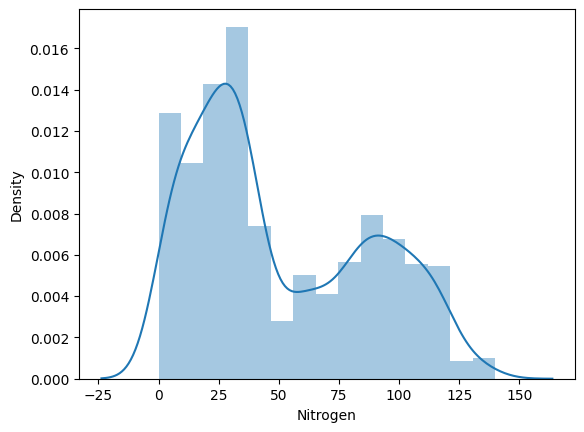

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df['Nitrogen'])
# getting distribution for column N
plt.show()

# **Preprocessing the data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# replacing the label column with categories i.e using numerical values using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [ ]:
# Trnasforming the data
le.fit(df["label"])
df["label"] = le.transform(df["label"])

In [ ]:
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [ ]:
# Get all tranformed classes by LabelEncoder
le.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [ ]:
for class_index, class_label in enumerate(le.classes_):
    print(f"{class_index}: {class_label}")

0: apple
1: banana
2: blackgram
3: chickpea
4: coconut
5: coffee
6: cotton
7: grapes
8: jute
9: kidneybeans
10: lentil
11: maize
12: mango
13: mothbeans
14: mungbean
15: muskmelon
16: orange
17: papaya
18: pigeonpeas
19: pomegranate
20: rice
21: watermelon


In [ ]:
X = df.drop(['label'],axis=1)
y = df['label']

In [ ]:
X

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [ ]:
# Scaling the data between 0 to 1

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [ ]:
X_test

array([[ 1.34934948, -1.0960582 , -0.02225388, ...,  1.05232434,
        -0.37619899, -1.38984486],
       [ 1.26889319, -1.36698971,  0.05607978, ...,  0.67956909,
        -0.28013033, -0.96895253],
       [ 0.22296144,  0.25859933,  0.01691295, ...,  0.98974316,
         0.60209743,  0.22056087],
       ...,
       [ 1.88572474, -0.19295318, -0.62933977, ...,  0.35134079,
         1.61311363, -0.54905776],
       [ 1.75163092, -0.04243567, -0.57058952, ...,  0.1731198 ,
        -0.46741089, -0.64767698],
       [-1.22525175,  0.43922034, -0.55100611, ..., -1.74645651,
        -0.45817577,  0.95946086]])

In [ ]:
# deciding the best model

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier()
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)

    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.9636363636363636
Support Vector Machine  with accuracy : 0.9681818181818181
K-Nearest Neighbors  with accuracy : 0.9568181818181818
Decision Tree  with accuracy : 0.9818181818181818
Random Forest  with accuracy : 0.9931818181818182
Bagging  with accuracy : 0.990909090909091


# **Prediction System**

In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
ypred = model.predict(X_test)
accuracy_score(y_test,ypred)

0.9931818181818182

In [ ]:
# Selecting Random Forest model

def recommend(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    transformed_features = ms.transform(features)
    transformed_features = sc.transform(transformed_features)
    prediction = model.predict(transformed_features).reshape(1,-1)

    return prediction[0]


In [ ]:
N = 16
P = 6
k = 29
temperature = 29.04
humidity = 91.0
ph = 6.9
rainfall = 137.0

predict = recommend(N,P,k,temperature,humidity,ph,rainfall)


print(predict)

# getting back the category from the label of label encoder
print(le.inverse_transform(predict)[0])


[4]
coconut


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
df.sample()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
1858,32,11,31,29.516116,92.564929,6.461226,131.211617,4


In [ ]:
for class_index, class_label in enumerate(le.classes_):
    print(f"{class_index}: {class_label}")

0: apple
1: banana
2: blackgram
3: chickpea
4: coconut
5: coffee
6: cotton
7: grapes
8: jute
9: kidneybeans
10: lentil
11: maize
12: mango
13: mothbeans
14: mungbean
15: muskmelon
16: orange
17: papaya
18: pigeonpeas
19: pomegranate
20: rice
21: watermelon


In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))

In [ ]:
pickle.dump(le,open("label.pkl",'wb'))

In [ ]:
import sklearn
print(sklearn.__version__)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x785f0f1d72e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


1.5.0


In [ ]:
!pip install --upgrade --force-reinstall scikit-learn


  Using cached scikit_learn-1.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached scipy-1.13.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.5.0
    Uninstalling threadpoolctl-3.5.0:
      Successfully uninstalled threadpoolctl-3.5.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1: